In [3]:
import time
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Load Dataset
mnist = load_digits()

x = mnist.data.astype(np.float32)
y = mnist.target.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

n_samples, n_features = x.shape
print("Bilder: ", n_samples)
print("Pixel: ", n_features)

Bilder:  1797
Pixel:  64


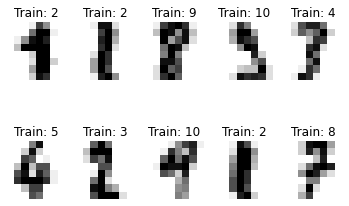

In [5]:
# Plot random images
for index, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Train: %i' % (label+1))

In [6]:
# Normalize Features with StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Aufgabe 1: Trainiere eine SVM mit der GridSearch.
Was fällt beim Training auf?

In [7]:
parameters = {
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], 
    'gamma': [0.01, 0.001]
}

svm = SVC()

start_time = time.time()
clf = GridSearchCV(svm, parameters, cv=10, n_jobs=-1)
clf.fit(x_train, y_train)
end_time = time.time()
print("Training done in ", (end_time - start_time), " seconds.")

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)

Training done in  8.15769648551941  seconds.


Aufgabe 2: Gebe die Genauigkeit und die Confusion_matrix an.

In [8]:
print("Score: ", score)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Score:  0.9730639730639731
Confusion matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  2  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  1 71  1  0  0  0]
 [ 0  0  0  0  0  1 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  1  1  0  0  0  0 48  1]
 [ 0  0  0  1  0  1  1  0  1 64]]


Aufgabe 3: Wendet PCA an um die Feature-Dimensionen zu senken.
Es soll min 95 der Varianz behalten werden.
Trainiere anschließend eine SVM mit der GridSearch.
Was fällt beim Training auf?

In [9]:
pca = PCA(n_components=0.97)
pca.fit(x_train)
x_train_transformed = pca.transform(x_train)
x_test_transformed = pca.transform(x_test)

print("Dimensions before:  ", x_train.shape[1])
print("Dimensions to keep: ", len(pca.components_ ))
print("Explained Variance: ", round(sum(pca.explained_variance_ratio_ ), 8))

Dimensions before:   64
Dimensions to keep:  45
Explained Variance:  0.97104097


In [10]:
parameters = {
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], 
    'gamma': [0.01, 0.001]
}

svm = SVC()

start_time = time.time()
clf = GridSearchCV(svm, parameters, cv=10, n_jobs=-1)
clf.fit(x_train_transformed, y_train)
end_time = time.time()
print("Training done in ", (end_time - start_time), " seconds.")

y_pred = clf.predict(x_test_transformed)
score = clf.score(x_test_transformed, y_test)

Training done in  2.175182342529297  seconds.


Aufgabe 4: Gebe die Genauigkeit und die Confusion_matrix  des besten Modells an.

In [11]:
print("Score: ", score)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Score:  0.9747474747474747
Confusion matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 54  1  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  1  0  0  1  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  1 71  1  0  0  0]
 [ 0  0  0  0  0  1 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  1  1  0  0  0  0 49  0]
 [ 0  0  0  1  0  1  1  1  0 64]]
